In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2

### A. Initial Data Cleaning

In [69]:
og_data = pd.read_csv('diabetes_data_upload.csv')

In [70]:
og_data.rename(columns={'class': 'Diabetes Result'}, inplace=True)

In [71]:
og_data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### B. Using LabelEncoder to convert binary categorical data into binary numeric data

In [75]:
enc = LabelEncoder()
og_data[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'Diabetes Result']] = og_data[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'Diabetes Result']].apply(enc.fit_transform)

In [76]:
og_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [78]:
og_data.shape

(520, 17)

### C. Feature Evaluation

### C - 1. PCA (Principal Component Analysis)

In [98]:
X = og_data.drop(columns=['Diabetes Result'],axis=1)
y= og_data[['Diabetes Result']]
print(X.shape, y.shape)

(520, 16) (520, 1)


In [99]:
pca=PCA()
X_pca = pca.fit_transform(X)

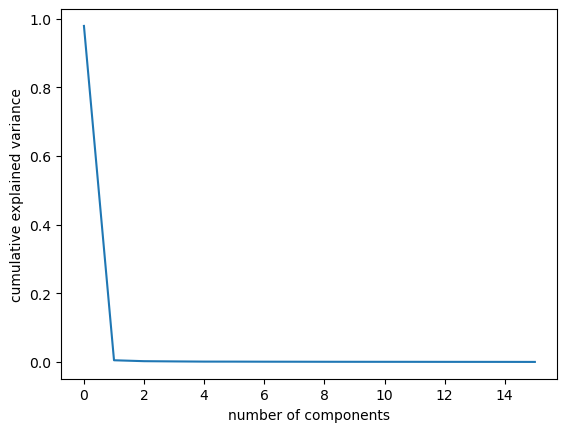

In [100]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### C - 2. Variance Threshold
Feature Selector that removes all low-variance features

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [102]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(X_train)

VarianceThreshold(threshold=0)

In [103]:
#Find non constant features
sum(var_threshold.get_support())

16

In [104]:
constant_columns = [column for column in X_train.columns if column not in X_train.columns[var_threshold.get_support()]]
print(len(constant_columns))

0


In [105]:
for column in constant_columns: 
    print(column)

### C - 3. Chi-Squared

<Axes: >

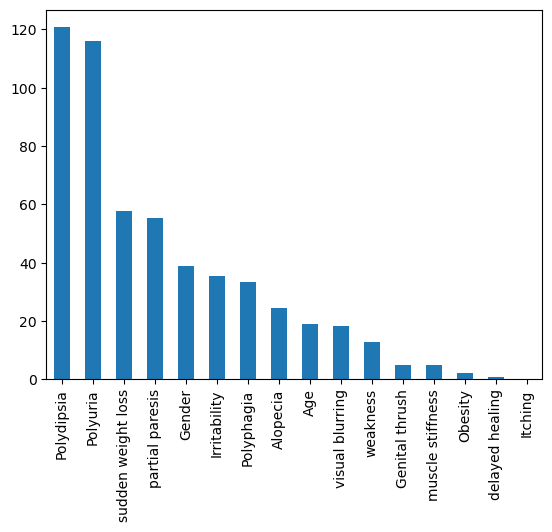

In [108]:
chi_scores = chi2(X,y)
#higher the chi value, higher the importance. 
chi_values = pd.Series(chi_scores[0], index = X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

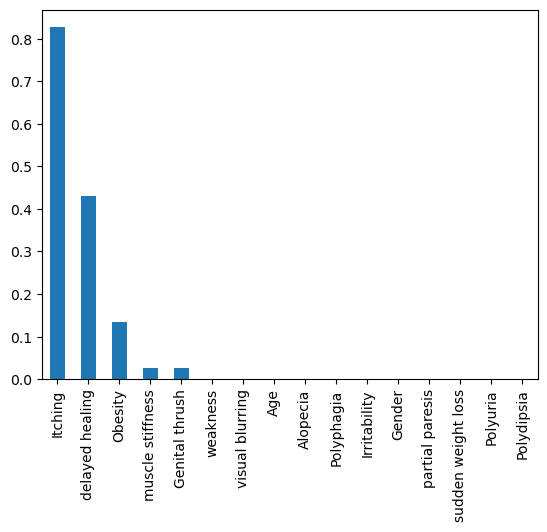

In [109]:
#higher the p-value value, lower the importance. 
#if p-value > 0.5, lower the importance. 
chi_values = pd.Series(chi_scores[1], index = X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

### D. Train Models


### D- 1. Logistic Regression Model Training 

### D-1.1 Logistic Regression Training Model 1 and Evaluation

This logistics model was trained using all features. 

In [110]:
X = og_data.drop(columns=['Diabetes Result'],axis=1)
y= og_data[['Diabetes Result']]
print(X.shape, y.shape)

(520, 16) (520, 1)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [130]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
X_train_pred_probs = log_reg.predict_proba(X_train)[:, 1]

/Users/alexyeo/Documents/temp/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
print(f'Accuracy on training data: {accuracy_score(log_reg.predict(X_train), y_train):.2f}')

Accuracy on training data: 0.92


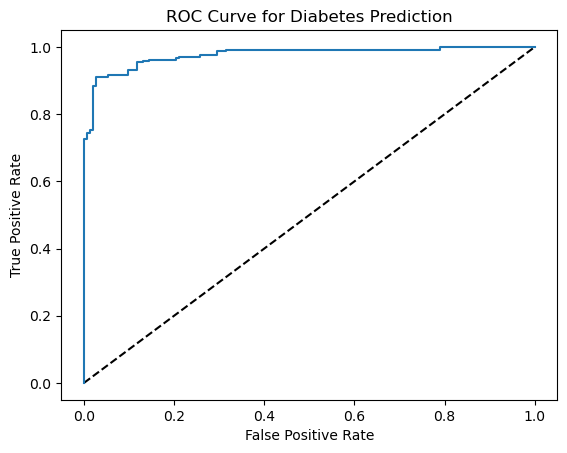

In [131]:
fpr, tpr, thresholds = roc_curve(y_train, X_train_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [136]:
# Calculate roc_auc_score
print(roc_auc_score(y_train, X_train_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_train, log_reg.predict(X_train)))

# Calculate the classification report
print(classification_report(y_train, log_reg.predict(X_train)))

0.9763931888544891
[[140  12]
 [ 20 218]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       152
           1       0.95      0.92      0.93       238

    accuracy                           0.92       390
   macro avg       0.91      0.92      0.91       390
weighted avg       0.92      0.92      0.92       390



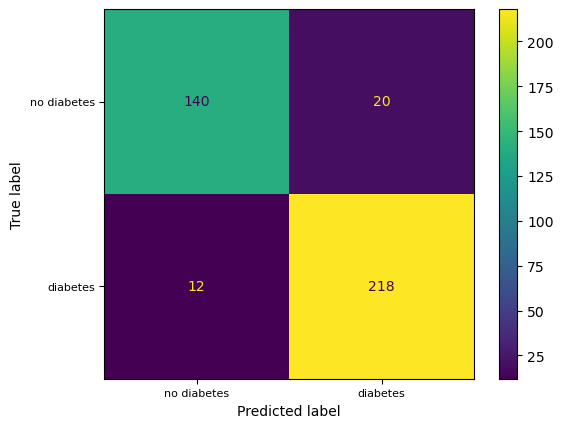

In [119]:
cm = confusion_matrix(log_reg.predict(X_train), y_train, labels = log_reg.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'diabetes'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax)

### D-1.2 Logistic Regression Training Model 2 and Evaluation

This logistics model was trained using the top 5 variance features as shown in the chi-square features shown above.

In [158]:
X_1 = og_data[['Polydipsia', 'Polyuria', 'sudden weight loss', 'partial paresis', 'Gender']]
y= og_data[['Diabetes Result']]
print(X_1.shape, y.shape)

(520, 5) (520, 1)


In [159]:
X_1train, X_1test, y_train, y_test = train_test_split(X_1, y, test_size = 0.25, random_state = 123)

In [160]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_1train, y_train)
X_1train_pred_probs = log_reg.predict_proba(X_1train)[:, 1]

/Users/alexyeo/Documents/temp/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [161]:
print(f'Accuracy on training data: {accuracy_score(log_reg.predict(X_1train), y_train):.2f}')

Accuracy on training data: 0.89


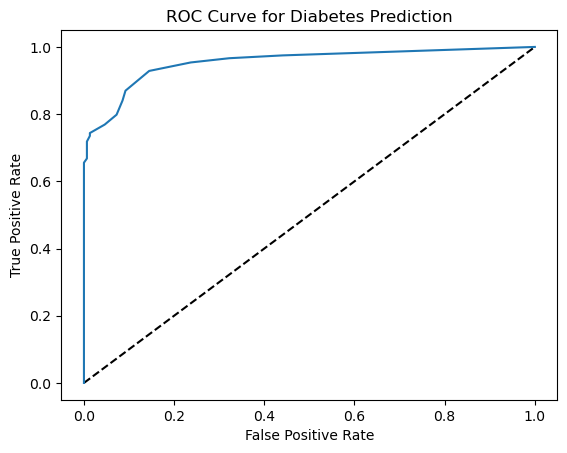

In [162]:
fpr, tpr, thresholds = roc_curve(y_train, X_1train_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [163]:
# Calculate roc_auc_score
print(roc_auc_score(y_train, X_1train_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_train, log_reg.predict(X_1train)))

# Calculate the classification report
print(classification_report(y_train, log_reg.predict(X_1train)))

0.9542652587350731
[[134  18]
 [ 24 214]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       152
           1       0.92      0.90      0.91       238

    accuracy                           0.89       390
   macro avg       0.89      0.89      0.89       390
weighted avg       0.89      0.89      0.89       390



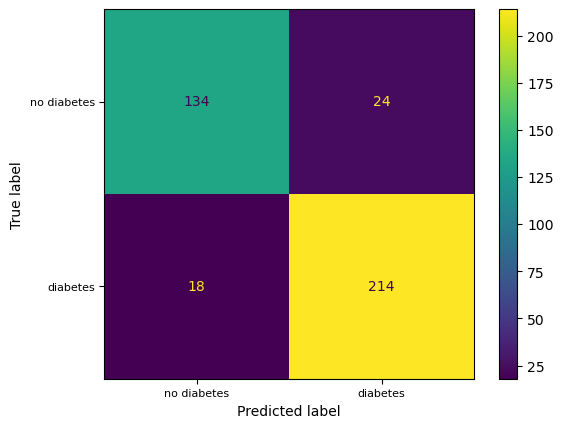

In [164]:
cm = confusion_matrix(log_reg.predict(X_1train), y_train, labels = log_reg.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'diabetes'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax)

### D-1.3 Logistic Regression Training Model 3 and Evaluation

This logistics model was trained using top 2 variance features of the chi-square feature selection above.

In [165]:
X_2 = og_data[['Polydipsia', 'Polyuria', 'sudden weight loss']]
y= og_data[['Diabetes Result']]
print(X_2.shape, y.shape)

(520, 3) (520, 1)


In [166]:
X_2train, X_2test, y_train, y_test = train_test_split(X_2, y, test_size = 0.25, random_state = 123)

In [167]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_2train, y_train)
X_2train_pred_probs = log_reg.predict_proba(X_2train)[:, 1]

/Users/alexyeo/Documents/temp/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
print(f'Accuracy on training data: {accuracy_score(log_reg.predict(X_2train), y_train):.2f}')

Accuracy on training data: 0.86


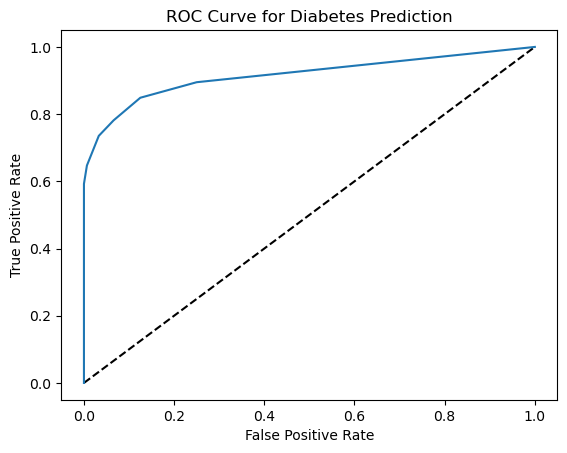

In [170]:
fpr, tpr, thresholds = roc_curve(y_train, X_2train_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [171]:
# Calculate roc_auc_score
print(roc_auc_score(y_train, X_2train_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_train, log_reg.predict(X_2train)))

# Calculate the classification report
print(classification_report(y_train, log_reg.predict(X_2train)))

0.9150680008845642
[[133  19]
 [ 36 202]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       152
           1       0.91      0.85      0.88       238

    accuracy                           0.86       390
   macro avg       0.85      0.86      0.85       390
weighted avg       0.86      0.86      0.86       390



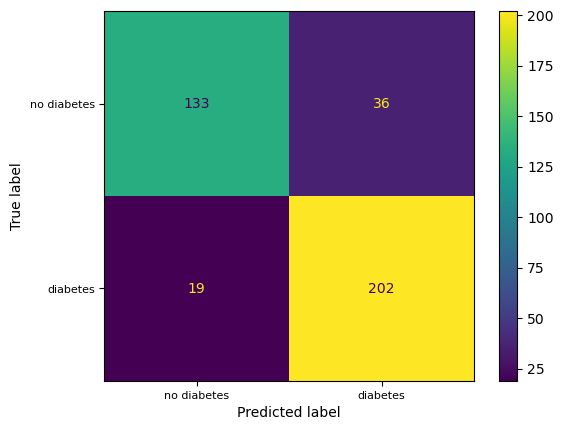

In [172]:
cm = confusion_matrix(log_reg.predict(X_2train), y_train, labels = log_reg.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'diabetes'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax)

### D-1.4 Logistic Regression Training Model 4 and Evaluation

This logistics regression model was trained by eliminating features with less variance powers.  

In [202]:
X_4 = og_data.drop(['Itching', 'Diabetes Result', 'sudden weight loss', 'weakness', 'visual blurring', 'muscle stiffness', 'Alopecia', 'Obesity'], axis=1)
y= og_data[['Diabetes Result']]
print(X_4.shape, y.shape)

(520, 9) (520, 1)


In [203]:
X_4train, X_4test, y_train, y_test = train_test_split(X_4, y, test_size = 0.25, random_state = 123)

In [204]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_4train, y_train)
X_4train_pred_probs = log_reg.predict_proba(X_4train)[:, 1]

/Users/alexyeo/Documents/temp/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [205]:
print(f'Accuracy on training data: {accuracy_score(log_reg.predict(X_4train), y_train):.2f}')

Accuracy on training data: 0.93


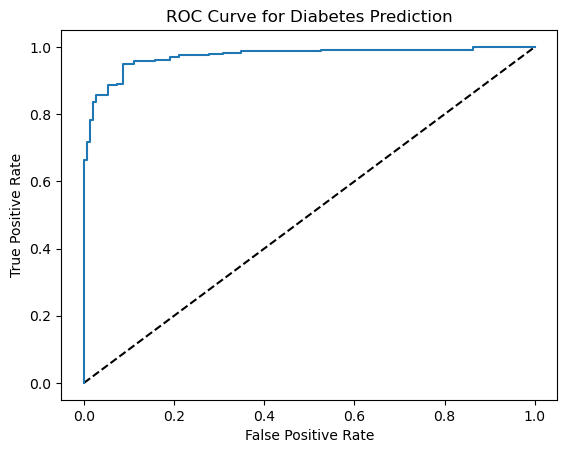

In [206]:
fpr, tpr, thresholds = roc_curve(y_train, X_4train_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [207]:
# Calculate roc_auc_score
print(roc_auc_score(y_train, X_4train_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_train, log_reg.predict(X_4train)))

# Calculate the classification report
print(classification_report(y_train, log_reg.predict(X_4train)))

0.9728272888102609
[[139  13]
 [ 16 222]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       152
           1       0.94      0.93      0.94       238

    accuracy                           0.93       390
   macro avg       0.92      0.92      0.92       390
weighted avg       0.93      0.93      0.93       390



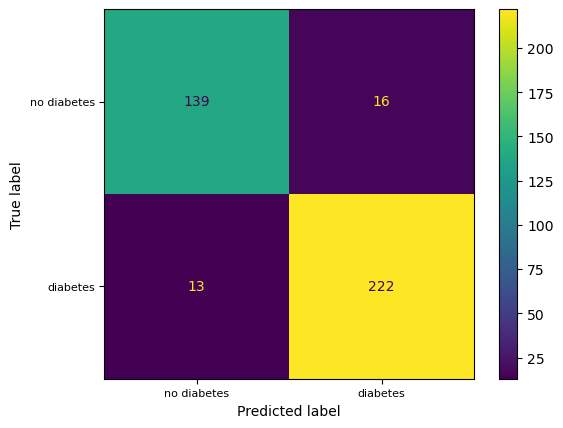

In [208]:
cm = confusion_matrix(log_reg.predict(X_4train), y_train, labels = log_reg.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'diabetes'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax)

### D- 2. Random Forest Model Training 

### D-2.1 Random Forest Training Model 1, feature importance, and evaluation

In [180]:
X = og_data.drop(columns=['Diabetes Result'],axis=1)
y= og_data[['Diabetes Result']]
print(X.shape, y.shape)

(520, 16) (520, 1)


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [182]:
# Create and fit the model
clf = RandomForestClassifier(n_estimators=300, random_state=1, n_jobs=-1)
model_res = clf.fit(X_train, y_train)

# Predict class labels
y_train_pred = model_res.predict(X_train)

# Predict class probabilities
y_train_pred_prob = model_res.predict_proba(X_train)

# Convert y_pred_prob to numpy array if necessary
y_train_pred_prob = np.array(y_train_pred_prob)

# Convert y_train and y_train_pred to numpy arrays if they are DataFrames
if isinstance(y_train_pred, pd.DataFrame):
    y_train_pred = y_train_pred.values
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values

# Flatten arrays if necessary
if len(y_train_pred.shape) > 1:
    y_train_pred = np.argmax(y_train_pred, axis=1)  # Convert one-hot encoded predictions to class labels

if len(y_test.shape) > 1:
    y_train = np.argmax(y_train, axis=1)  # Convert one-hot encoded true labels to class labels

# Calculate metrics
ac = accuracy_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred, average='weighted')
cm = confusion_matrix(y_train, y_train_pred)

# Print results
print('Random Forest: Accuracy=%.3f' % ac)
print('Random Forest: f1-score=%.3f' % f1)
print('Confusion Matrix:\n', cm)

/var/folders/rs/tgtjg5z57zv1nf83v_yq3b7h0000gn/T/ipykernel_16252/3245443867.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_res = clf.fit(X_train, y_train)


Random Forest: Accuracy=0.390
Random Forest: f1-score=0.561
Confusion Matrix:
 [[152 238]
 [  0   0]]


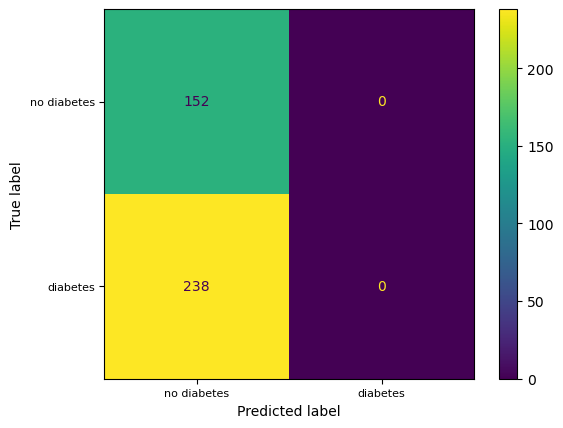

In [184]:
cm = confusion_matrix(clf.predict(X_train), y_train, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'diabetes'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax)

16


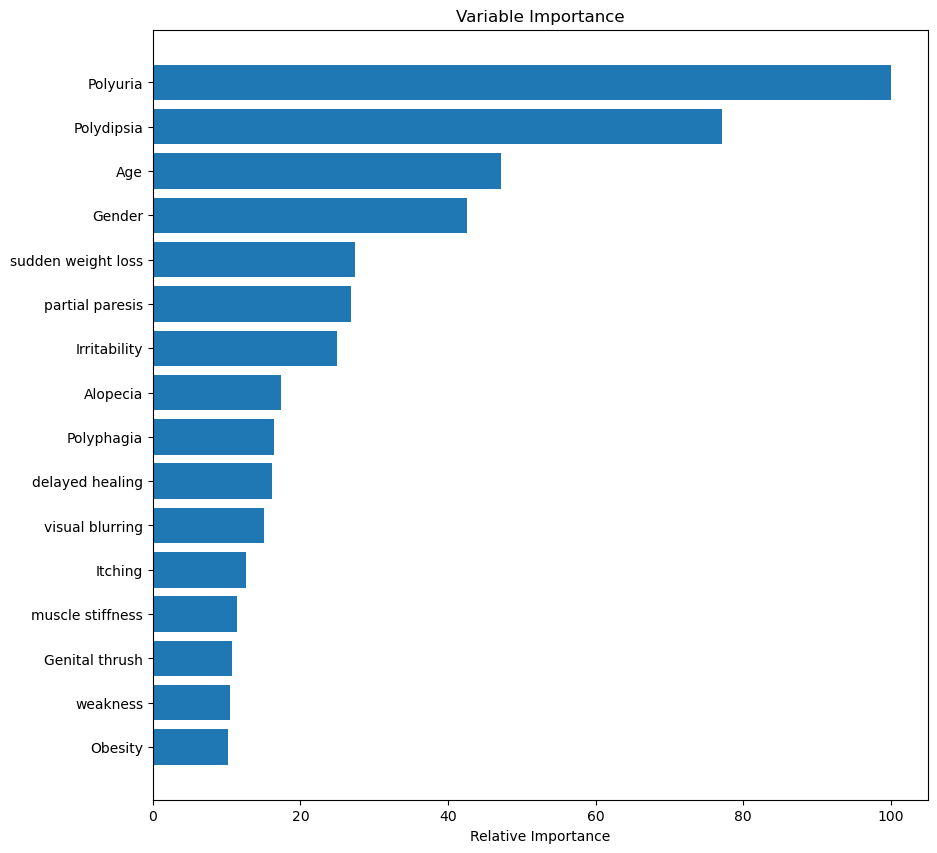

In [183]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### D-2.2 Random Forest Training Model 2, feature importance, and evaluation

In [198]:
X_3 = og_data[['Polydipsia', 'Polyuria', 'Age', 'Gender']]
y= og_data[['Diabetes Result']]
print(X_3.shape, y.shape)

(520, 4) (520, 1)


In [199]:
X_3train, X_3test, y_train, y_test = train_test_split(X_3, y, test_size = 0.25, random_state = 123)

In [200]:
# Create and fit the model
clf = RandomForestClassifier(n_estimators=300, random_state=1, n_jobs=-1)
model_res = clf.fit(X_3train, y_train)

# Predict class labels
y_train_pred = model_res.predict(X_3train)

# Predict class probabilities
y_train_pred_prob = model_res.predict_proba(X_3train)

# Convert y_pred_prob to numpy array if necessary
y_train_pred_prob = np.array(y_train_pred_prob)

# Convert y_train and y_train_pred to numpy arrays if they are DataFrames
if isinstance(y_train_pred, pd.DataFrame):
    y_train_pred = y_train_pred.values
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values

# Flatten arrays if necessary
if len(y_train_pred.shape) > 1:
    y_train_pred = np.argmax(y_train_pred, axis=1)  # Convert one-hot encoded predictions to class labels

if len(y_test.shape) > 1:
    y_train = np.argmax(y_train, axis=1)  # Convert one-hot encoded true labels to class labels

# Calculate metrics
ac = accuracy_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred, average='weighted')
cm = confusion_matrix(y_train, y_train_pred)

# Print results
print('Random Forest: Accuracy=%.3f' % ac)
print('Random Forest: f1-score=%.3f' % f1)
print('Confusion Matrix:\n', cm)

/var/folders/rs/tgtjg5z57zv1nf83v_yq3b7h0000gn/T/ipykernel_16252/3311547695.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_res = clf.fit(X_3train, y_train)


Random Forest: Accuracy=0.415
Random Forest: f1-score=0.587
Confusion Matrix:
 [[162 228]
 [  0   0]]


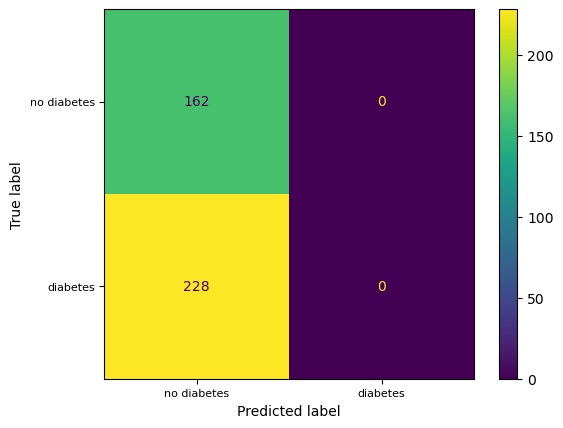

In [201]:
cm = confusion_matrix(clf.predict(X_3train), y_train, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no diabetes', 'diabetes'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'], fontsize = 8)
display_cm.plot(ax = ax)